<a href="https://colab.research.google.com/github/23subbhashit/MovieRecommendationSystemIIITB/blob/main/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Recommendation


## Data Processing

In [2]:
import csv
with open('movies.dat', 'r', encoding='latin-1') as input_file, open('movies.csv', 'w', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(['ID', 'Title', 'Genres'])
    for line in input_file:
        movie_data = line.strip().split("::")
        csv_writer.writerow(movie_data)
print("Conversion complete. CSV file created: movies.csv")


Conversion complete. CSV file created: movies.csv


In [3]:
import csv
with open('users.dat', 'r', encoding='latin-1') as input_file, open('users.csv', 'w', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
    for line in input_file:
        user_data = line.strip().split("::")
        csv_writer.writerow(user_data)
print("Conversion complete. CSV file created: users.csv")


Conversion complete. CSV file created: users.csv


In [4]:
import csv
with open('ratings.dat', 'r', encoding='latin-1') as input_file, open('ratings.csv', 'w', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(['UserID', 'MovieID', 'Rating', 'Timestamp'])
    for line in input_file:
        rating_data = line.strip().split("::")
        csv_writer.writerow(rating_data)
print("Conversion complete. CSV file created: ratings.csv")

Conversion complete. CSV file created: ratings.csv


## Reading Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

moviedata = pd.read_csv("/content/movies.csv")
moviedata.head()

,ID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
userdata = pd.read_csv("/content/users.csv")
userdata.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
ratingdata = pd.read_csv("/content/ratings.csv")
ratingdata.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


## Analysis And EDA

<ipython-input-10-2df607125dd3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratingdata, palette='viridis')


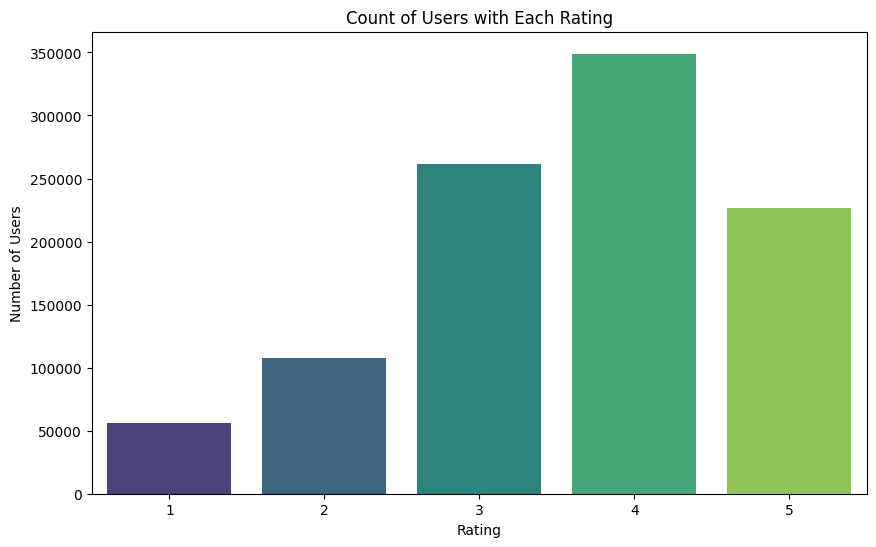

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', data=ratingdata, palette='viridis')

plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.title('Count of Users with Each Rating')

plt.show()


In [11]:
# Mapping of occupation codes to occupation names
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
}

userdata['Occupation_Name'] = userdata['Occupation'].map(occupation_mapping)

In [12]:
userdata.head()

,UserID,Gender,Age,Occupation,Zip-code,Occupation_Name
0,1,F,1,10,48067,K-12 student
1,2,M,56,16,70072,self-employed
2,3,M,25,15,55117,scientist
3,4,M,45,7,02460,executive/managerial
4,5,M,25,20,55455,writer


Text(0.5, 1.0, 'Distribution of Users Across Occupations')

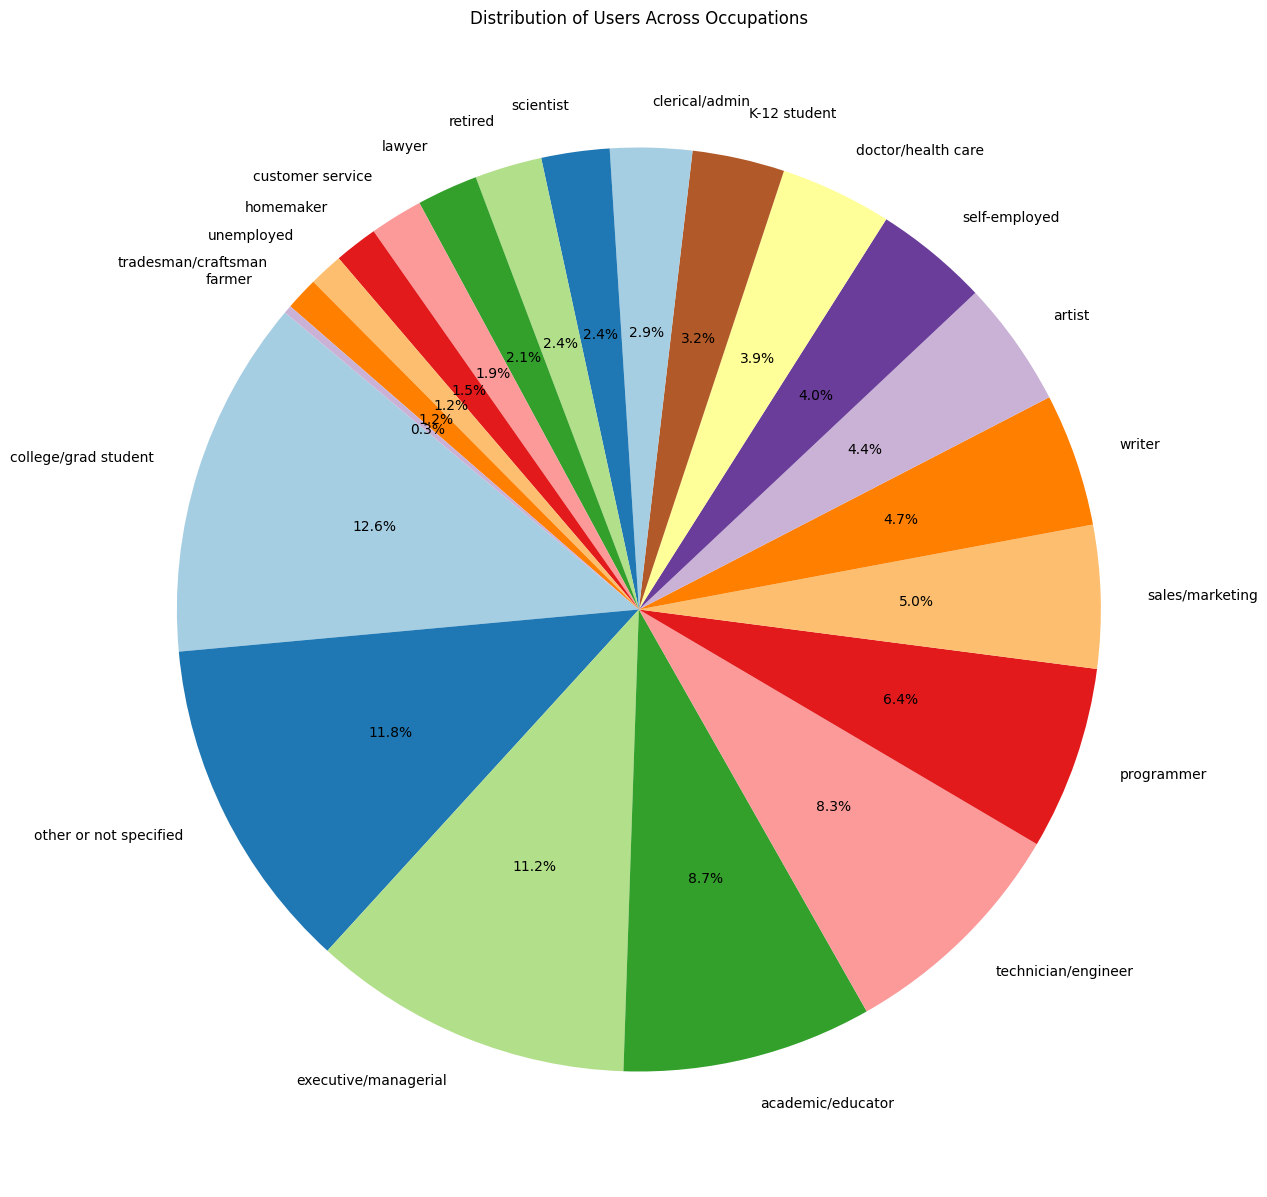

In [16]:
occupation_counts = userdata['Occupation_Name'].value_counts()
plt.figure(figsize=(15, 15))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Users Across Occupations')

In [17]:
moviedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      3883 non-null   int64 
 1   Title   3883 non-null   object
 2   Genres  3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [18]:
ratingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   UserID     1000209 non-null  int64
 1   MovieID    1000209 non-null  int64
 2   Rating     1000209 non-null  int64
 3   Timestamp  1000209 non-null  int64
dtypes: int64(4)
memory usage: 30.5 MB


In [19]:
userdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           6040 non-null   int64 
 1   Gender           6040 non-null   object
 2   Age              6040 non-null   int64 
 3   Occupation       6040 non-null   int64 
 4   Zip-code         6040 non-null   object
 5   Occupation_Name  6040 non-null   object
dtypes: int64(3), object(3)
memory usage: 283.2+ KB


# Neighbourhood-based Collaborative Filtering


In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
# Merge user and rating data
user_rating_data = pd.merge(userdata, ratingdata, on='UserID')
user_rating_data.head()

,UserID,Gender,Age,Occupation,Zip-code,Occupation_Name,MovieID,Rating,Timestamp
0,1,F,1,10,48067,K-12 student,1193,5,978300760
1,1,F,1,10,48067,K-12 student,661,3,978302109
2,1,F,1,10,48067,K-12 student,914,3,978301968
3,1,F,1,10,48067,K-12 student,3408,4,978300275
4,1,F,1,10,48067,K-12 student,2355,5,978824291


In [23]:
user_rating_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 9 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   UserID           1000209 non-null  int64 
 1   Gender           1000209 non-null  object
 2   Age              1000209 non-null  int64 
 3   Occupation       1000209 non-null  int64 
 4   Zip-code         1000209 non-null  object
 5   Occupation_Name  1000209 non-null  object
 6   MovieID          1000209 non-null  int64 
 7   Rating           1000209 non-null  int64 
 8   Timestamp        1000209 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 76.3+ MB


In [26]:
full_data = pd.merge(user_rating_data, moviedata, left_on='MovieID', right_on='ID')
full_data.head()

,UserID,Gender,Age,Occupation,Zip-code,Occupation_Name,MovieID,Rating,Timestamp,ID,Title,Genres
0,1,F,1,10,48067,K-12 student,1193,5,978300760,1193,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,self-employed,1193,5,978298413,1193,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,programmer,1193,4,978220179,1193,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,executive/managerial,1193,4,978199279,1193,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,academic/educator,1193,5,978158471,1193,One Flew Over the Cuckoo's Nest (1975),Drama


In [27]:
# user-item matrix
user_movie_matrix = full_data.pivot_table(index='UserID', columns='Title', values='Rating')
user_movie_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,NaN,3.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Fill NaN values with 0 (assuming no rating means a rating of 0)
user_movie_matrix = user_movie_matrix.fillna(0)
user_movie_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Calculate cosine similarity between users based on movie ratings
user_similarity_matrix = cosine_similarity(user_movie_matrix)
user_similarity_matrix

array([[1.        , 0.09638153, 0.12060981, ..., 0.        , 0.17460369,
        0.13359025],
       [0.09638153, 1.        , 0.1514786 , ..., 0.06611767, 0.0664575 ,
        0.21827563],
       [0.12060981, 0.1514786 , 1.        , ..., 0.12023352, 0.09467506,
        0.13314404],
       ...,
       [0.        , 0.06611767, 0.12023352, ..., 1.        , 0.16171426,
        0.09930008],
       [0.17460369, 0.0664575 , 0.09467506, ..., 0.16171426, 1.        ,
        0.22833237],
       [0.13359025, 0.21827563, 0.13314404, ..., 0.09930008, 0.22833237,
        1.        ]])

In [32]:
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.index)
user_similarity_df

UserID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.096382,0.120610,0.132455,0.090158,0.179222,0.059678,0.138241,0.226148,0.255288,...,0.170588,0.082006,0.069807,0.033663,0.114877,0.186329,0.135979,0.000000,0.174604,0.133590
2,0.096382,1.000000,0.151479,0.171176,0.114394,0.100865,0.305787,0.203337,0.190198,0.226861,...,0.112503,0.091222,0.268565,0.014286,0.183384,0.228241,0.206274,0.066118,0.066457,0.218276
3,0.120610,0.151479,1.000000,0.151227,0.062907,0.074603,0.138332,0.077656,0.126457,0.213655,...,0.092960,0.125864,0.161507,0.000000,0.097308,0.143264,0.107744,0.120234,0.094675,0.133144
4,0.132455,0.171176,0.151227,1.000000,0.045094,0.013529,0.130339,0.100856,0.093651,0.120738,...,0.163629,0.093041,0.382803,0.000000,0.082097,0.170583,0.127464,0.062907,0.064634,0.137968
5,0.090158,0.114394,0.062907,0.045094,1.000000,0.047449,0.126257,0.220817,0.261330,0.117052,...,0.100652,0.035732,0.061806,0.054151,0.179083,0.293365,0.172686,0.020459,0.027689,0.241437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.186329,0.228241,0.143264,0.170583,0.293365,0.093583,0.122441,0.227400,0.239607,0.338072,...,0.131294,0.209843,0.186426,0.103431,0.267405,1.000000,0.341462,0.124174,0.219115,0.411891
6037,0.135979,0.206274,0.107744,0.127464,0.172686,0.065788,0.111673,0.144395,0.225055,0.246902,...,0.142309,0.276134,0.129985,0.118749,0.141676,0.341462,1.000000,0.049015,0.252146,0.428240
6038,0.000000,0.066118,0.120234,0.062907,0.020459,0.065711,0.000000,0.019242,0.093470,0.113789,...,0.108837,0.106897,0.040689,0.000000,0.063967,0.124174,0.049015,1.000000,0.161714,0.099300


In [39]:
def predict_rating(user_movie_matrix, user_similarity_matrix, user_id, movie_id):
    # Get the ratings and similarity values for the user and movie
    ratings_for_movie = user_movie_matrix[movie_id]
    similarities_with_users = user_similarity_matrix[user_id]

    # Filter out the current user and get the non-zero similarity values
    nonzero_similarity_values = similarities_with_users[similarities_with_users.index != user_id]

    # Calculate the predicted rating using the formula
    numerator = sum(nonzero_similarity_values * ratings_for_movie[nonzero_similarity_values.index])
    denominator = sum(abs(nonzero_similarity_values))

    # Handle the case where the denominator is zero (to avoid division by zero)
    if denominator == 0:
        return 0

    # Normalize the predicted rating to the range of 1 to 5
    predicted_rating = min(5, max(1, numerator / denominator))
    return predicted_rating

In [42]:
user_id_to_predict = 6038
movie_id_to_predict = '101 Dalmatians (1961)'  # Adjust the movie title accordingly

predicted_rating = predict_rating(user_movie_matrix, user_similarity_df, user_id_to_predict, movie_id_to_predict)
print(f"Predicted rating for {movie_id_to_predict} by User {user_id_to_predict}: {predicted_rating}")

Predicted rating for 101 Dalmatians (1961) by User 6038: 1
